# Average coordinate of the ball - test

Here we compute the average coordinate of the center of the ball for the lane detection

MOTIVATION: This can be used in order to have a better lane detection. knowing more or less wich is the lane to consider.

PROBLEMS: There is no certainty about the correctness of the average center.

In [61]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

In [ ]:
# Define file paths
PROJECT_ROOT = Path().resolve().parent.parent
CSV_POSITIONS_FILE_PATH = str(PROJECT_ROOT / "data" / "auxiliary_data" / "circle_positions" / "Circle_positions_2.0.csv")
OUTPUT_CSV_PATH = str(PROJECT_ROOT / "data" / "auxiliary_data" / "circle_positions" / "Average_circle_position_2.csv")

notebook_dir = Path().resolve()
project_root = notebook_dir.parent.parent
video_path = project_root / "data" / "recording_2" / "Recording_2.mp4"

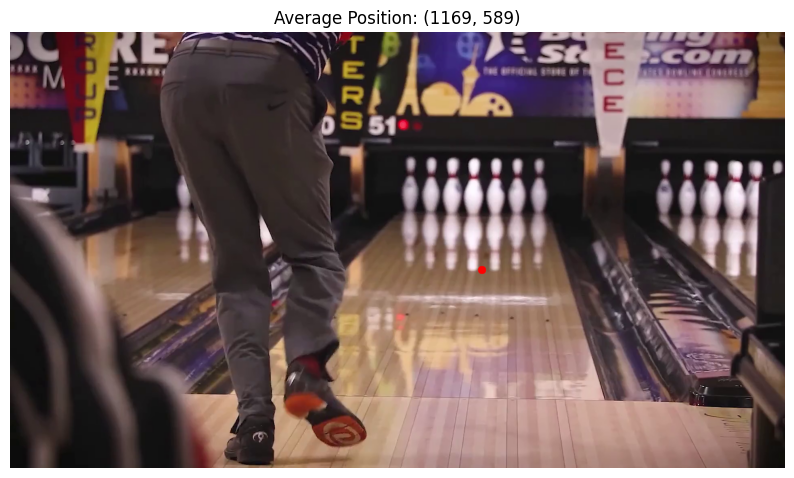

In [63]:
# Load CSV and clean data
df = pd.read_csv(CSV_POSITIONS_FILE_PATH)
df = df.dropna(subset=['X', 'Y']) # Drop rows where X or Y is NaN

# Compute the average X and Y
avg_x = int(df['X'].mean())
avg_y = int(df['Y'].mean())

# Save average coordinates to a new CSV file
avg_df = pd.DataFrame({'X': [avg_x], 'Y': [avg_y]})
avg_df.to_csv(OUTPUT_CSV_PATH, index=False)

# Load video and extract frame
cap = cv2.VideoCapture(str(video_path))
cap.set(cv2.CAP_PROP_POS_FRAMES, 1)  # Go to frame 1
ret, frame = cap.read()

if ret:
    # Convert to RGB for Matplotlib display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Draw the computed average point
    cv2.circle(frame_rgb, (avg_x, avg_y), radius=10, color=(255, 0, 0), thickness=-1)  # Red dot

    # Display the frame with the plotted point
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.title(f"Average Position: ({avg_x}, {avg_y})")
    plt.axis("off")
    plt.show()

cap.release()